In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [2]:
train_df = pd.read_csv('../kaggle/Customer Churn Prediction/train.csv')
df = train_df.copy()

print('Shape of data{}'.format(df.shape))
print('Number of rows{}'.format(df.shape[0]))
print('Number of rows{}'.format(df.shape[1]))
df.info()

Shape of data(4250, 20)
Number of rows4250
Number of rows20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   f

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


#### Data Exploration

In [5]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 16}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 14}

In [6]:
# Preparing Table
a = round(df['churn'].value_counts() / len(df['churn']), 2)
churn_ratio = pd.DataFrame(a).T
churn_ratio = churn_ratio.rename(columns={'no': 'Not Churn', 'yes': 'Churn'})
churn_ratio

,Not Churn,Churn
churn,0.86,0.14


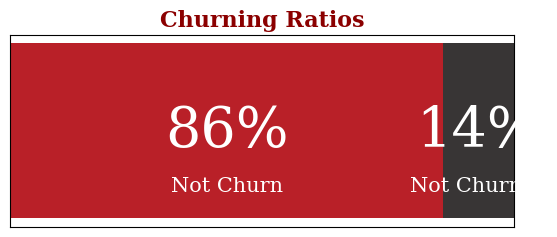

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))
ax.barh(churn_ratio.index, churn_ratio['Not Churn'], color='#b20710', alpha=0.9, label='Male')
ax.barh(churn_ratio.index, churn_ratio['Churn'], left=churn_ratio['Not Churn'], color='#221f1f',
       alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# /annotating code starts here
for i in churn_ratio.index:
    ax.annotate(f'{int(churn_ratio["Not Churn"][i] * 100)}%', xy=(churn_ratio['Not Churn'][i] / 2, i), va = 'center', ha='center', fontsize=40, fontweight='light', fontfamily='serif',color='white')
    ax.annotate('Not Churn', xy=(churn_ratio['Not Churn'][i] / 2, -0.25), va = 'center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')        
for i in churn_ratio.index:
    ax.annotate(f'{int(churn_ratio["Churn"][i] * 100)}%' ,
                xy=(churn_ratio['Not Churn'][i] + churn_ratio['Churn'][i] / 2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate('Not Churned' , xy=(churn_ratio['Not Churn'][i] + churn_ratio['Churn'][i] / 2, -0.25),
                    va = 'center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
                    color='white')        
    
plt.title('Churning Ratios', fontdict=axtitle_dict)
plt.show()

#### Missings and Duplicates values

In [8]:
print(df.isna().sum().sort_values(ascending=False))
print('duplicate values in df', df.duplicated().sum())
print('duplicates dropped')

state                            0
total_eve_charge                 0
number_customer_service_calls    0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_night_minutes              0
total_eve_calls                  0
area_code                        0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
churn                            0
dtype: int64
duplicate values in df 0
duplicates dropped


#### Filtering Numericals and Categoricals columns

In [9]:
df.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [10]:
df.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype='object')

In [11]:
categ_columns = []
for col in df.columns:
    if df[col].nunique() < 10:
        categ_columns.append(col)
        
print('categ numericals columns are {}'.format(categ_columns))

Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
           'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
           'total_eve_charge', 'total_night_minutes', 'total_night_calls',
           'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
           'total_intl_charge']
print('nums numericals columns are {}'.format(Num_cols))

categ numericals columns are ['area_code', 'international_plan', 'voice_mail_plan', 'churn']
nums numericals columns are ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


In [12]:
df.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_minutes                1843
total_day_charge                 1843
dtype: int64

#### Exploratory Data Analysis

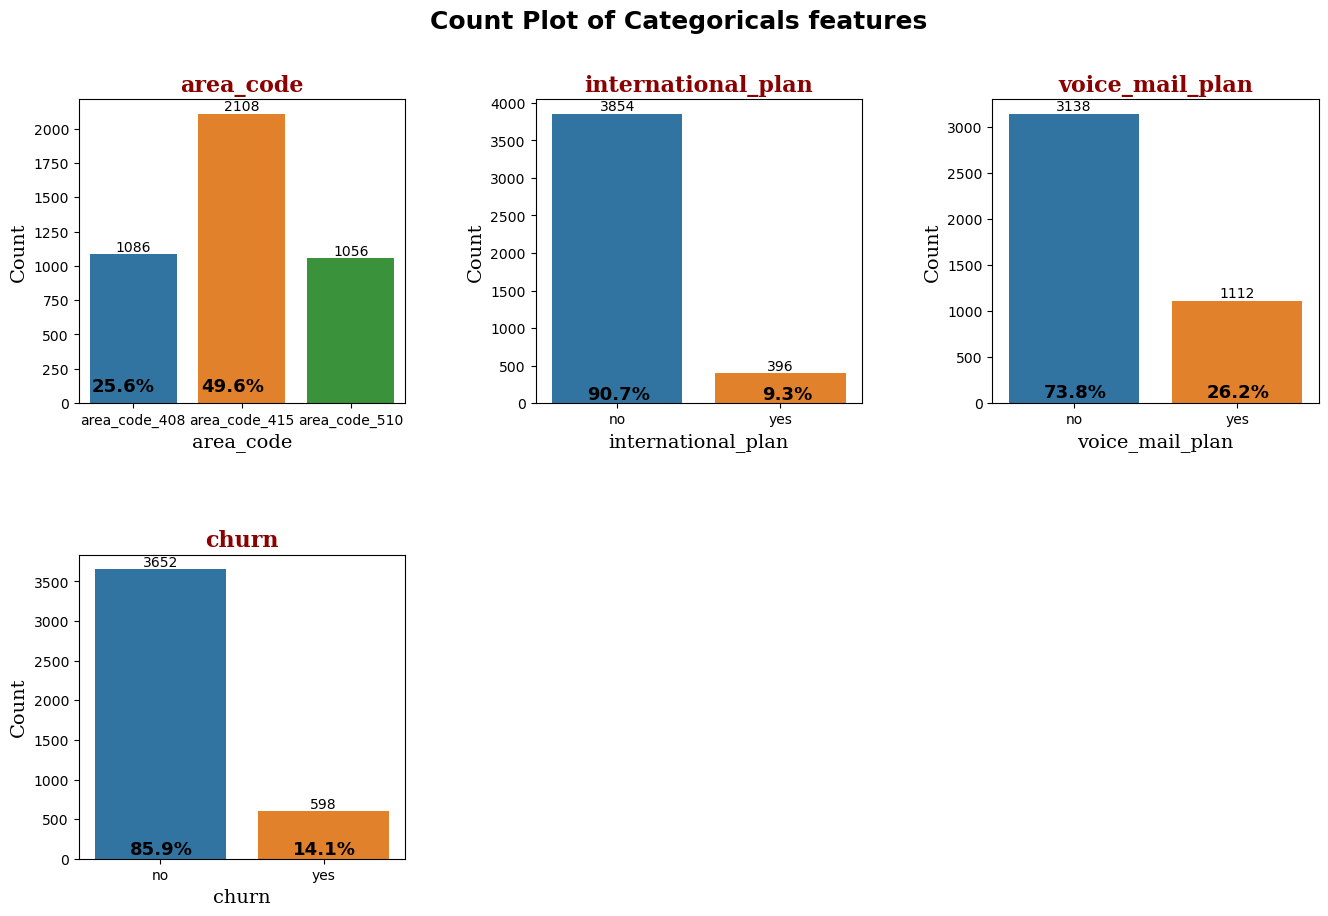

In [13]:
fig = plt.figure(figsize=[16, 15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, columns in enumerate(categ_columns):
    input = np.unique(df[columns], return_counts=True)
    col = 'input'
    ax1 = fig.add_subplot(3, 3, i+1)
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))

    # The below two lines of codes are used for percentage values
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]') / sum(eval(f'{col}[1]')) * 100, 1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]') / sum(eval(f'{col}[1]')) * 100, 1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])

In [14]:
colours = ['forestgreen', 'dodgerblue', 'goldenrod', 'coral', 'silver', 'gold', 'dodgerblue', 
          'forestgreen', 'dodgerblue', 'goldenrod', 'coral', 'silver', 'gold']

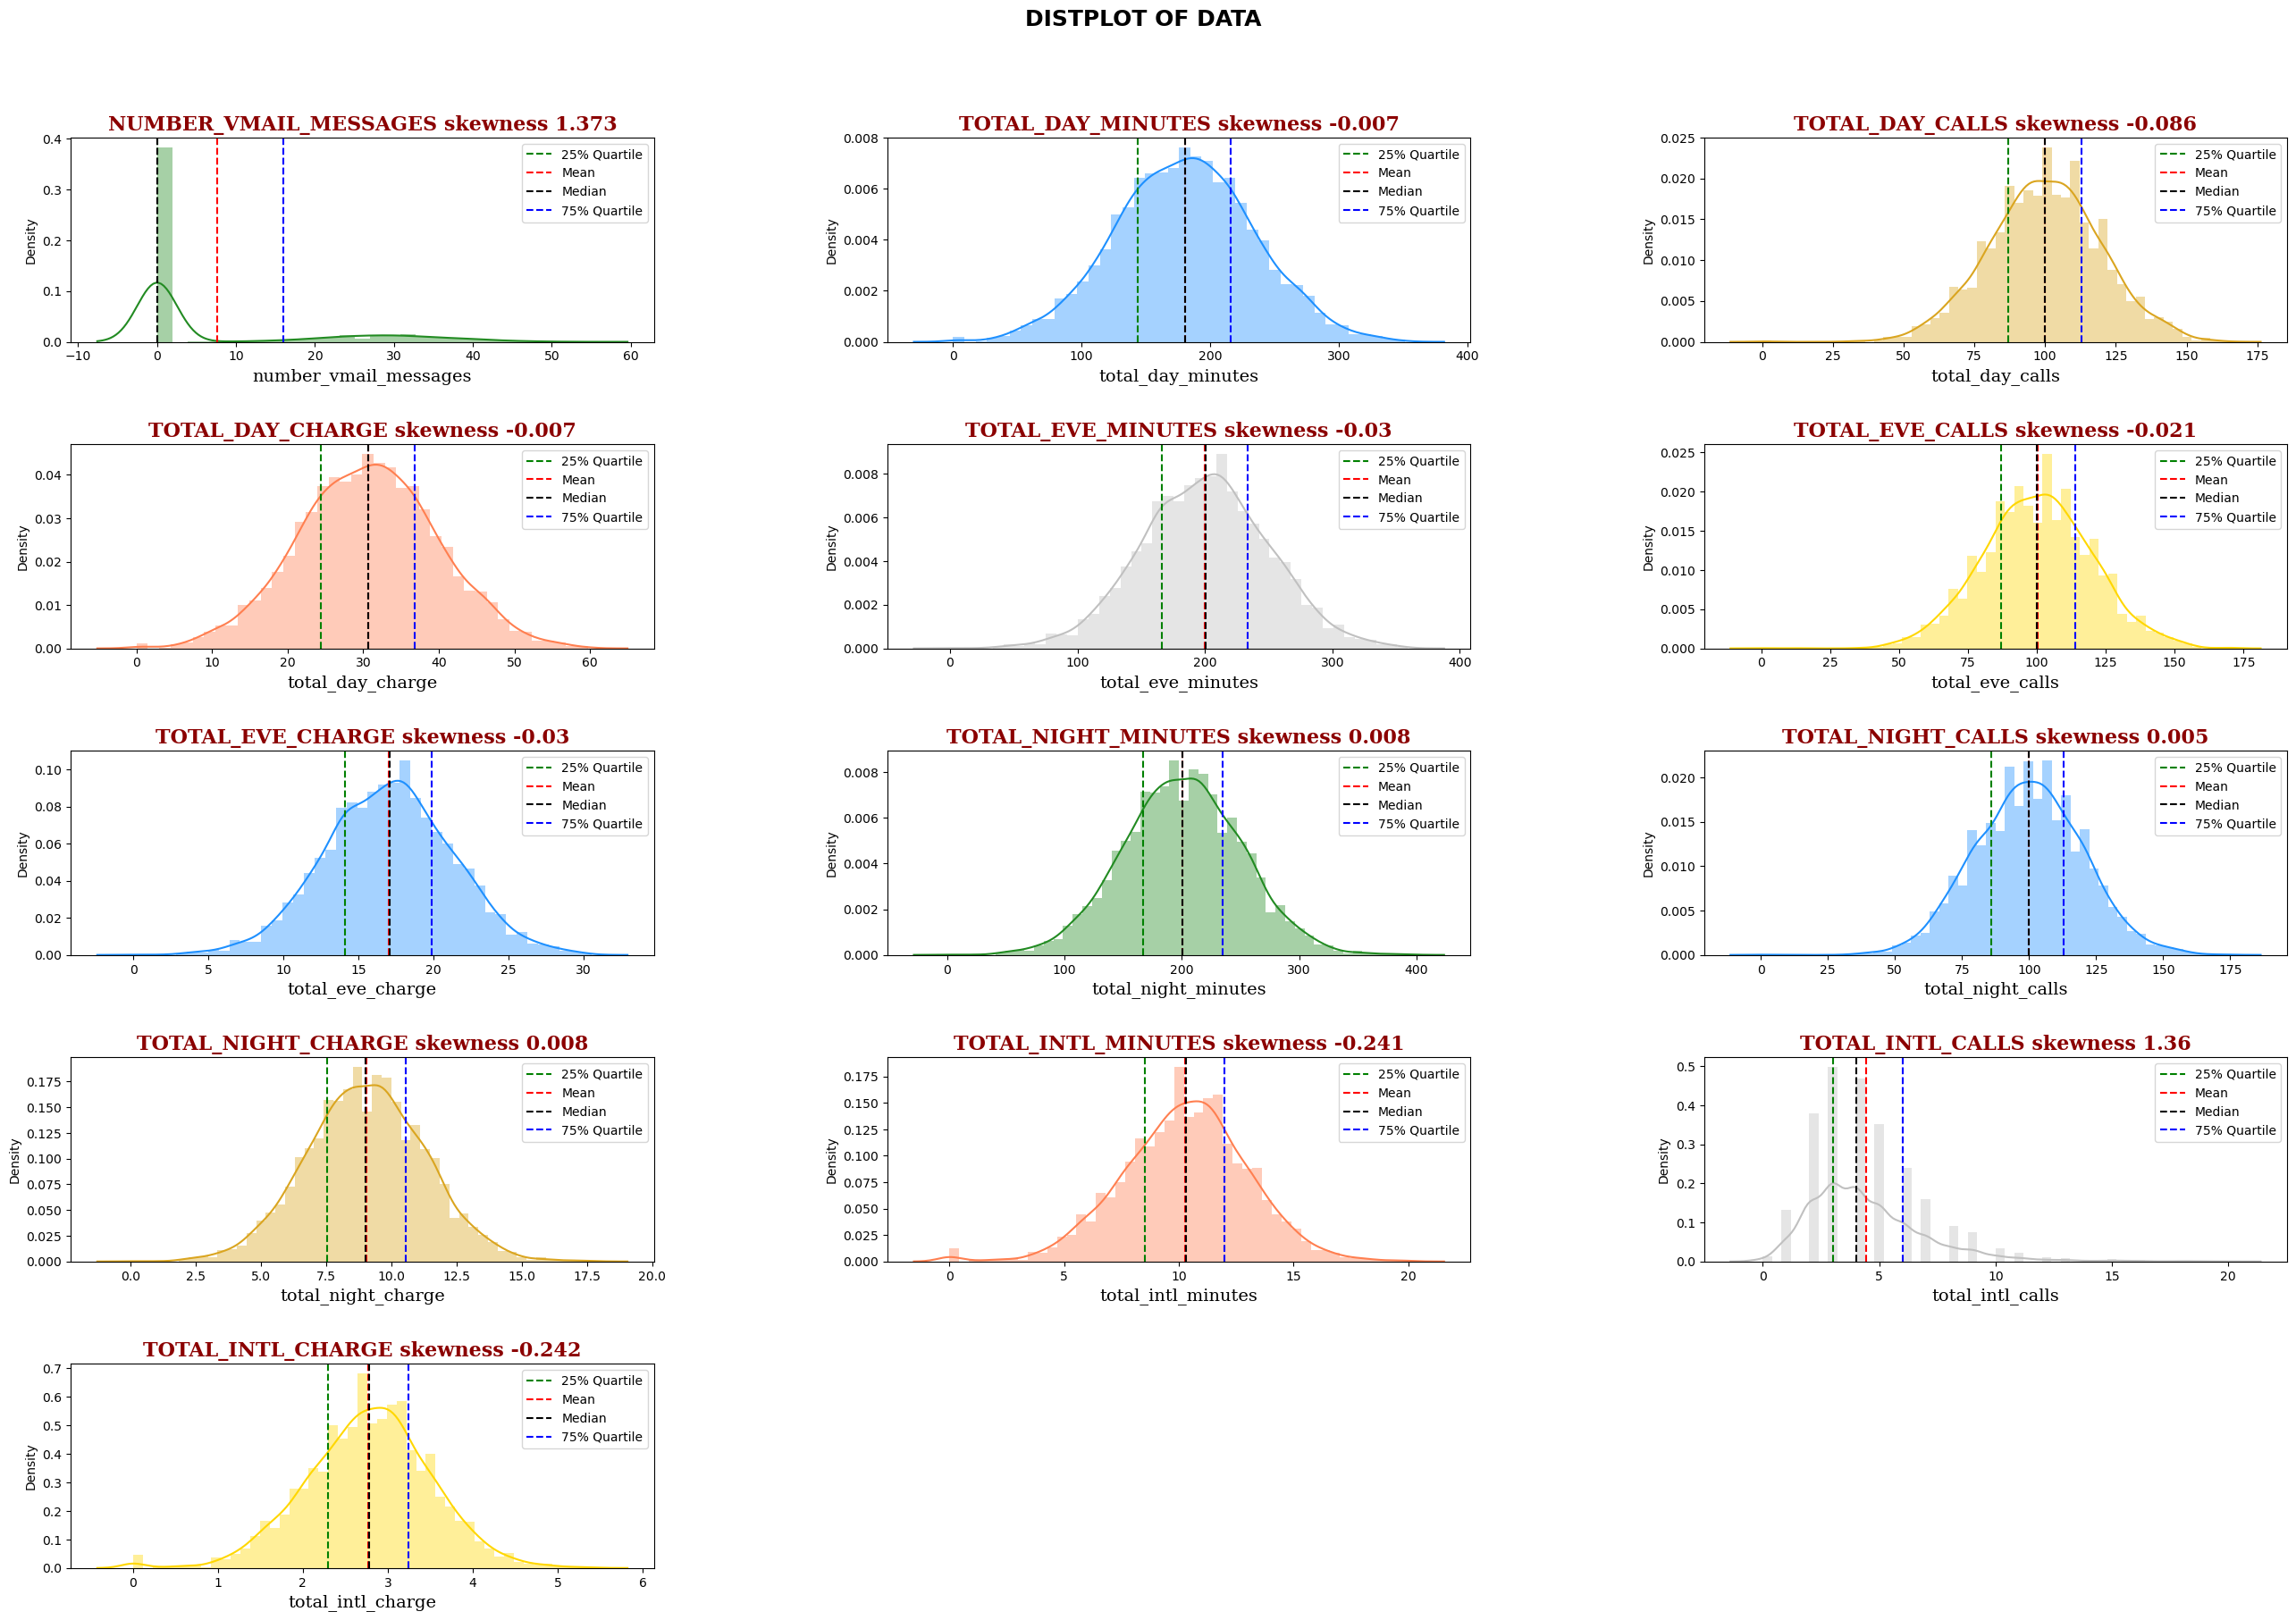

In [15]:
# create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32, 24])
fig.suptitle('DISTPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sns.distplot(df[col], color=colours[i])
    ax.axvline(df[col].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(df[col].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
    
    # ax.text('skewness: {}' .format(str(round(df[col].skew(), 3))), ha='right', vaa='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()} skewness {round(df[col].skew(), 3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10)

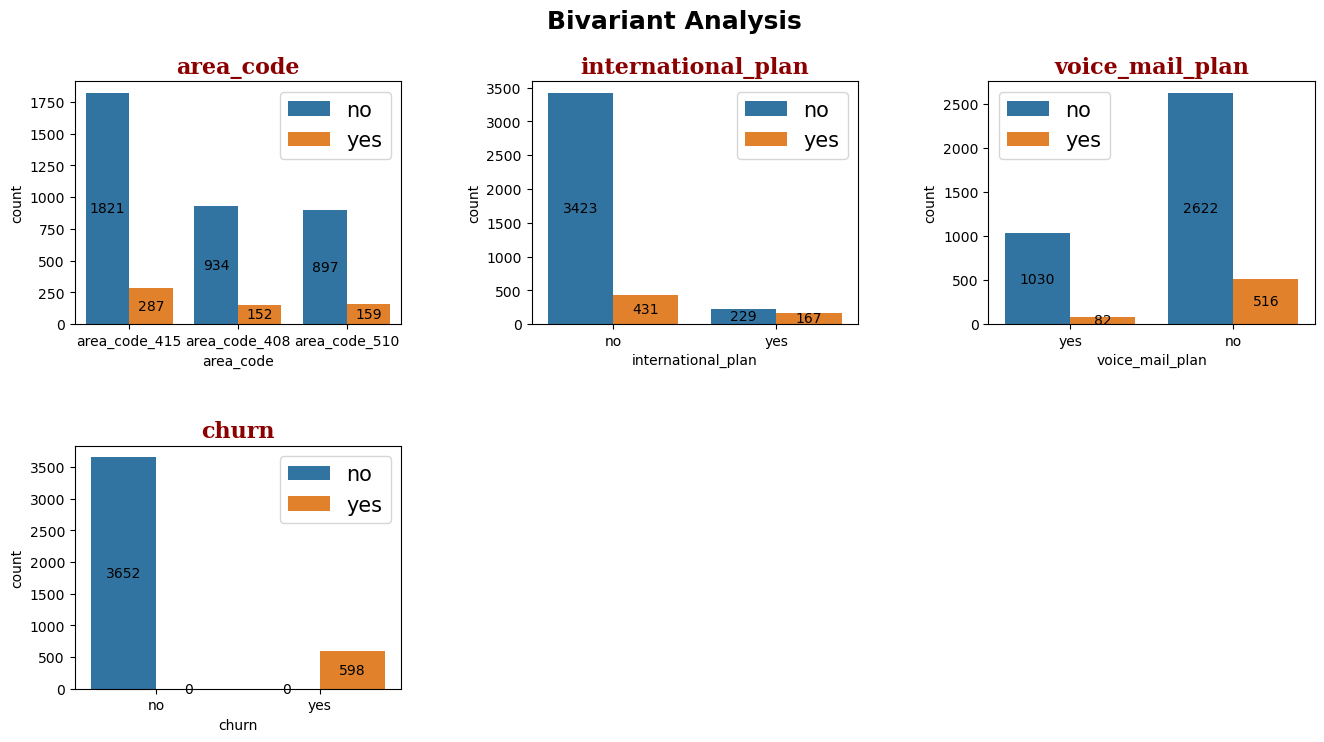

In [16]:
# create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16, 12])
fig.suptitle('Bivariant Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(categ_columns):
    a = fig.add_subplot(3, 3, i+1)
    a = sns.countplot(x=df[col], ax=a, hue=df['churn'])
    a.set_title(col, fontdict=axtitle_dict)
    a.bar_label(a.containers[0], label_type='center')
    a.bar_label(a.containers[1], label_type='center')
    a.legend(fontsize=15)

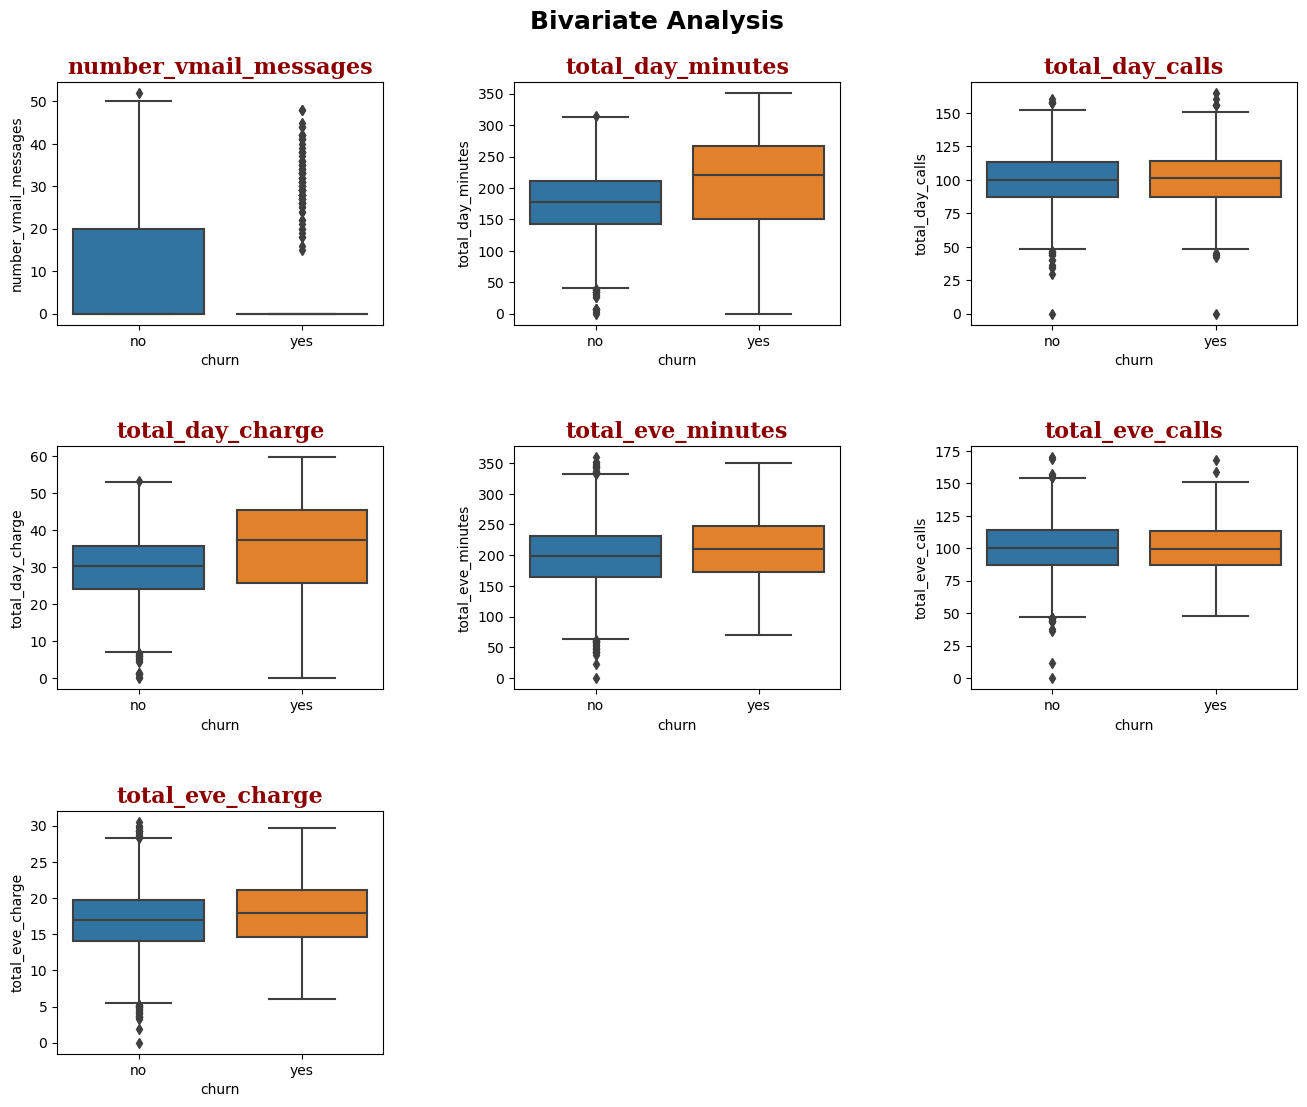

In [17]:
# create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16, 12])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(Num_cols[0:7]):
    a = fig.add_subplot(3, 3, i+1)
    a = sns.boxplot(x='churn', y=col, ax=a, data=df)
    a.set_title(col, fontdict=axtitle_dict)

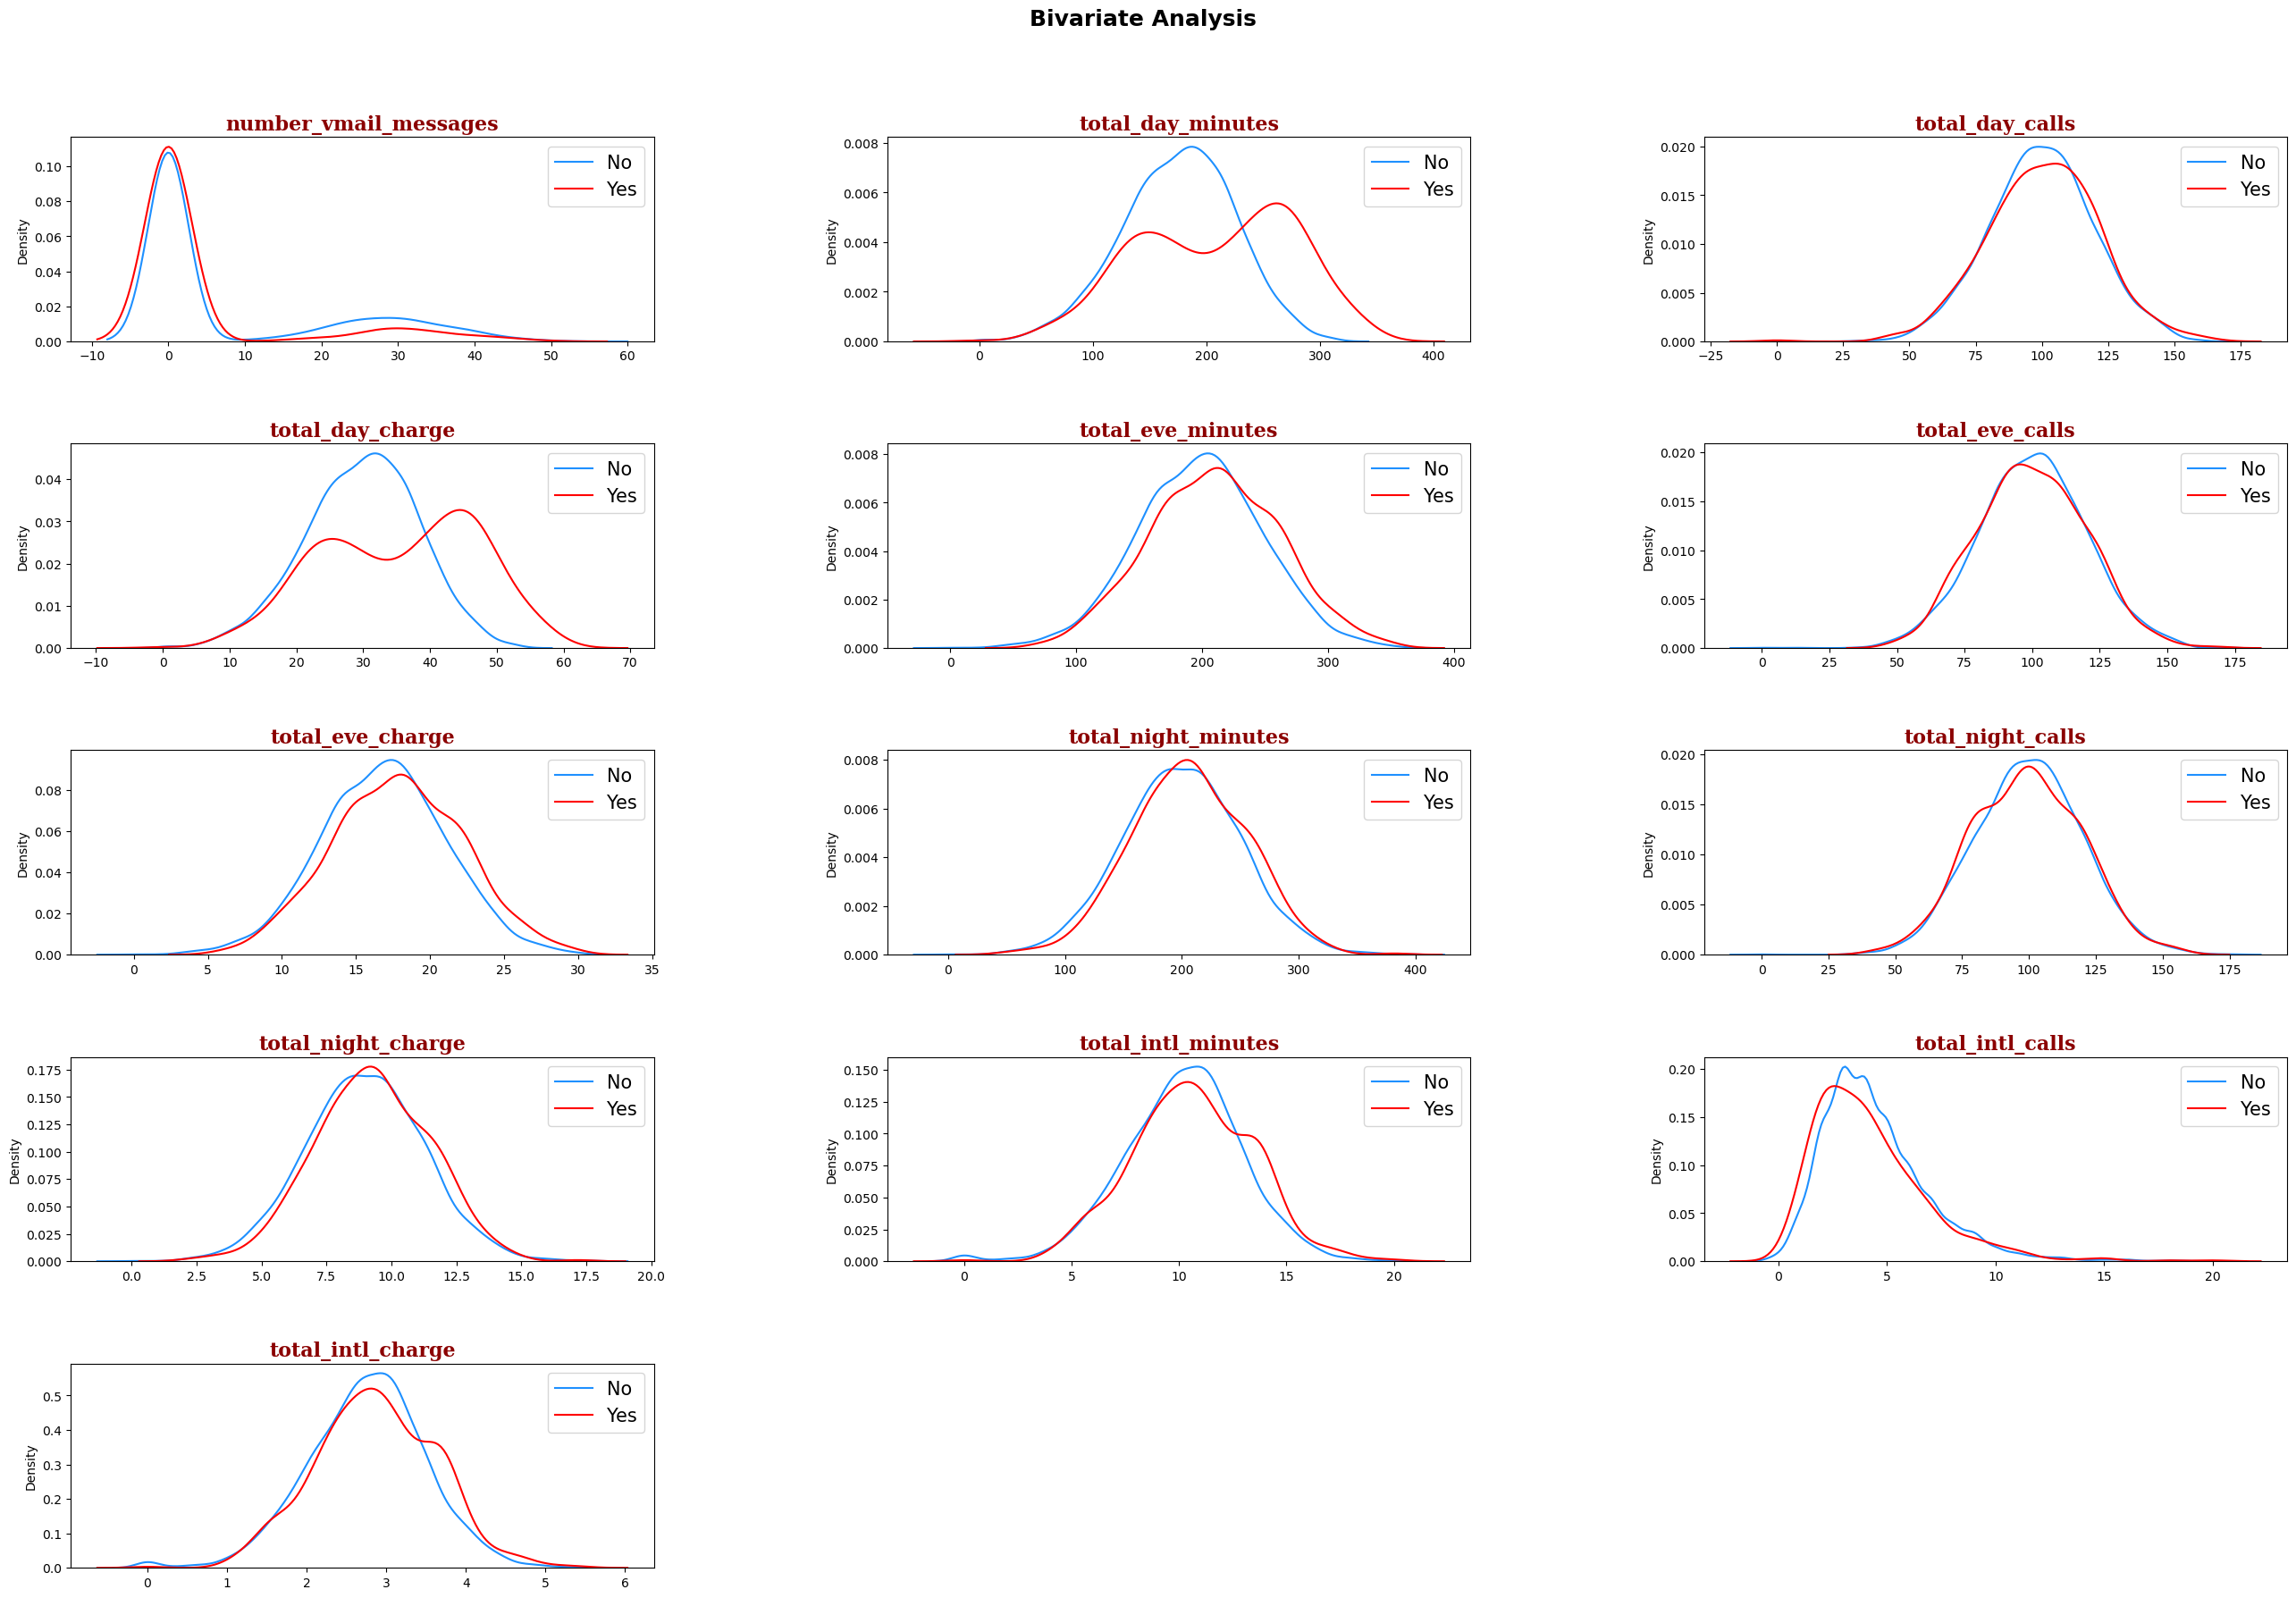

In [18]:
fig = plt.figure(figsize=([32, 24]))
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    sns.distplot(x=df[df['churn']=='no'][col], color='dodgerblue', ax=a, hist=False)
    sns.distplot(x=df[df['churn']=='yes'][col], color='red', ax=a, hist=False)
    a.set_title(col, fontdict=axtitle_dict)
    labels = ['No', 'Yes']
    a.legend(labels, fontsize=15)

#### Outliers Detection

In [19]:
# Check of outliers by applying the IQR method checking if values are way outside 
# the IQR borders
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[Num_cols]
print(df_num.describe())

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any())

       number_vmail_messages  total_day_minutes  total_day_calls  \
count            4250.000000        4250.000000      4250.000000   
mean                7.631765         180.259600        99.907294   
std                13.439882          54.012373        19.850817   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.325000        87.000000   
50%                 0.000000         180.450000       100.000000   
75%                16.000000         216.200000       113.000000   
max                52.000000         351.500000       165.000000   

       total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
count       4250.000000        4250.000000      4250.000000       4250.000000   
mean          30.644682         200.173906       100.176471         17.015012   
std            9.182096          50.249518        19.908591          4.271212   
min            0.000000           0.000000         0.000000    

#### Visualization of outliers using box plot

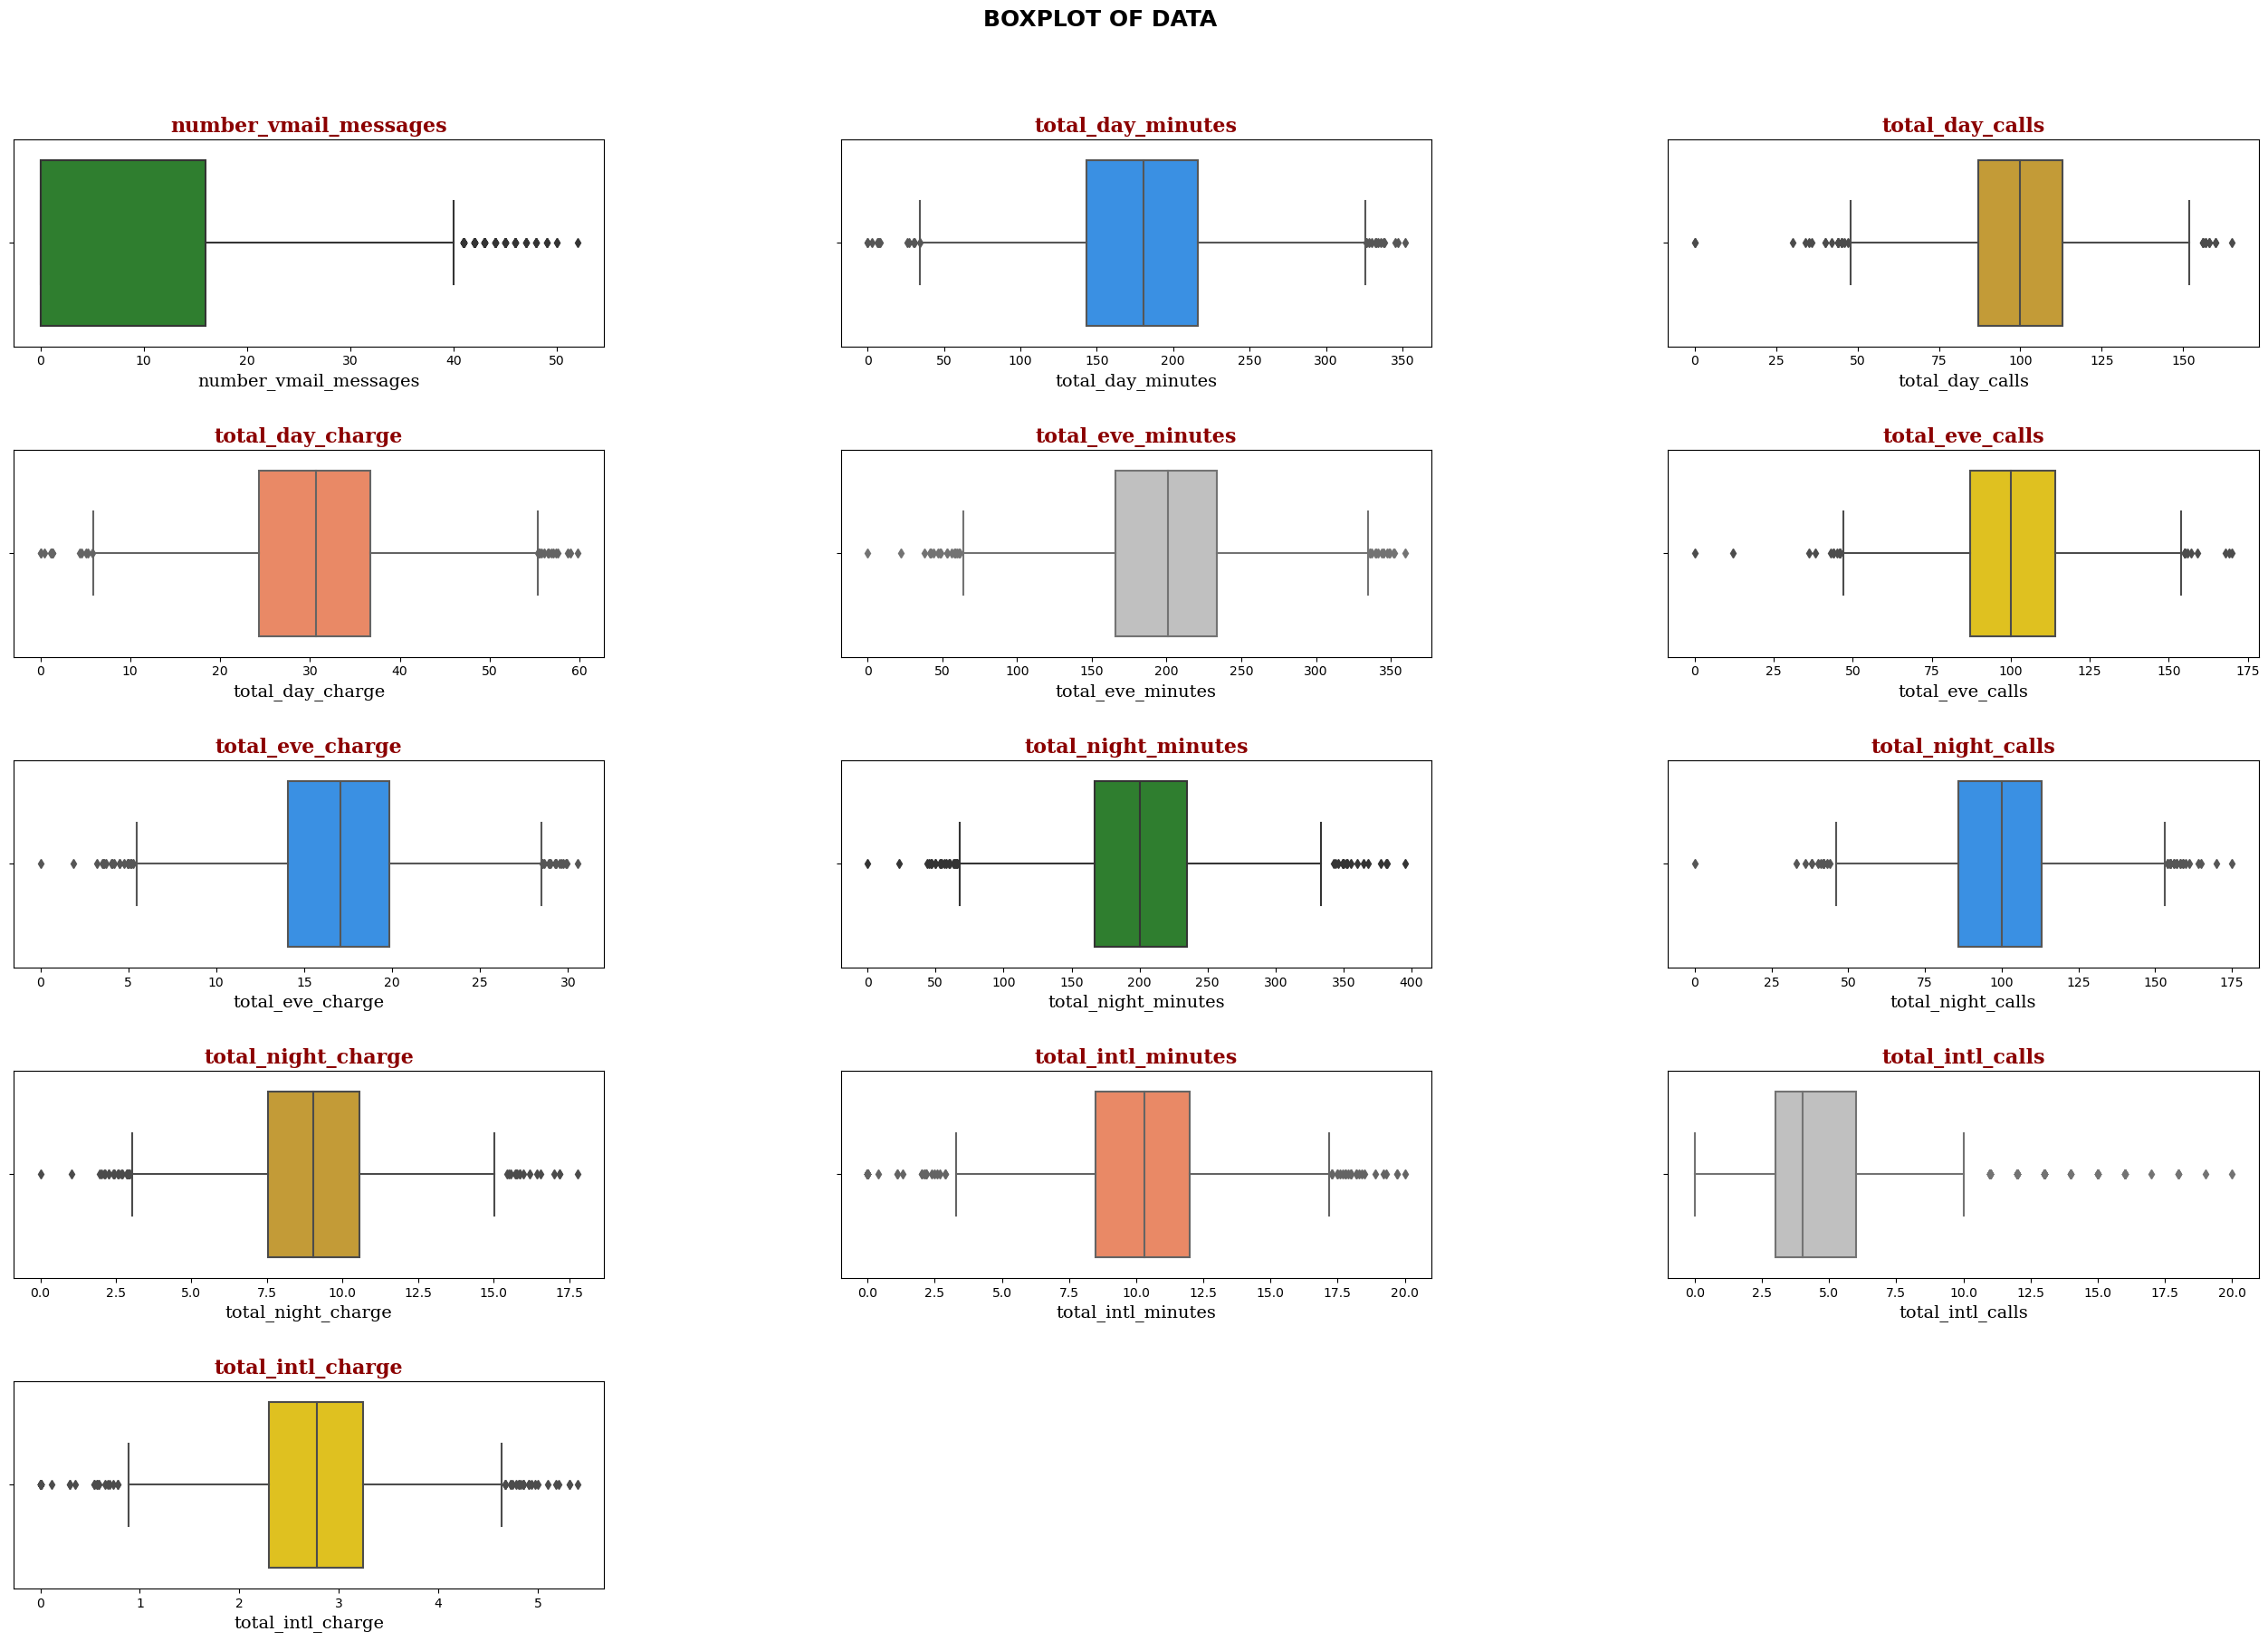

In [20]:
# Create figure with 3 x 3 gird of subplots
fig = plt.figure(figsize=[32, 24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6, 3, i+1)
    ax1 = sns.boxplot(data=df, x=col, color=colours[i])
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

In [21]:
# Finding the IQR For Budget columns
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit' + '_' + col] = upper_limit
    dict['lower_limit' + '_' + col] = lower_limit

In [22]:
for col in Num_cols:
    print('There are total {} Customers data which {} are less than lower limit.'.format(len(df[df[col] < dict['lower_limit_' + col]]), col))
    print('There are total {} Customers data which {} are less than upper limit.'.format(len(df[df[col] > dict['upper_limit_' + col]]), col))

There are total 0 Customers data which number_vmail_messages are less than lower limit.
There are total 86 Customers data which number_vmail_messages are less than upper limit.
There are total 12 Customers data which total_day_minutes are less than lower limit.
There are total 13 Customers data which total_day_minutes are less than upper limit.
There are total 18 Customers data which total_day_calls are less than lower limit.
There are total 10 Customers data which total_day_calls are less than upper limit.
There are total 12 Customers data which total_day_charge are less than lower limit.
There are total 14 Customers data which total_day_charge are less than upper limit.
There are total 19 Customers data which total_eve_minutes are less than lower limit.
There are total 15 Customers data which total_eve_minutes are less than upper limit.
There are total 13 Customers data which total_eve_calls are less than lower limit.
There are total 11 Customers data which total_eve_calls are less t

In [23]:
for col in Num_cols:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]
        )
    )

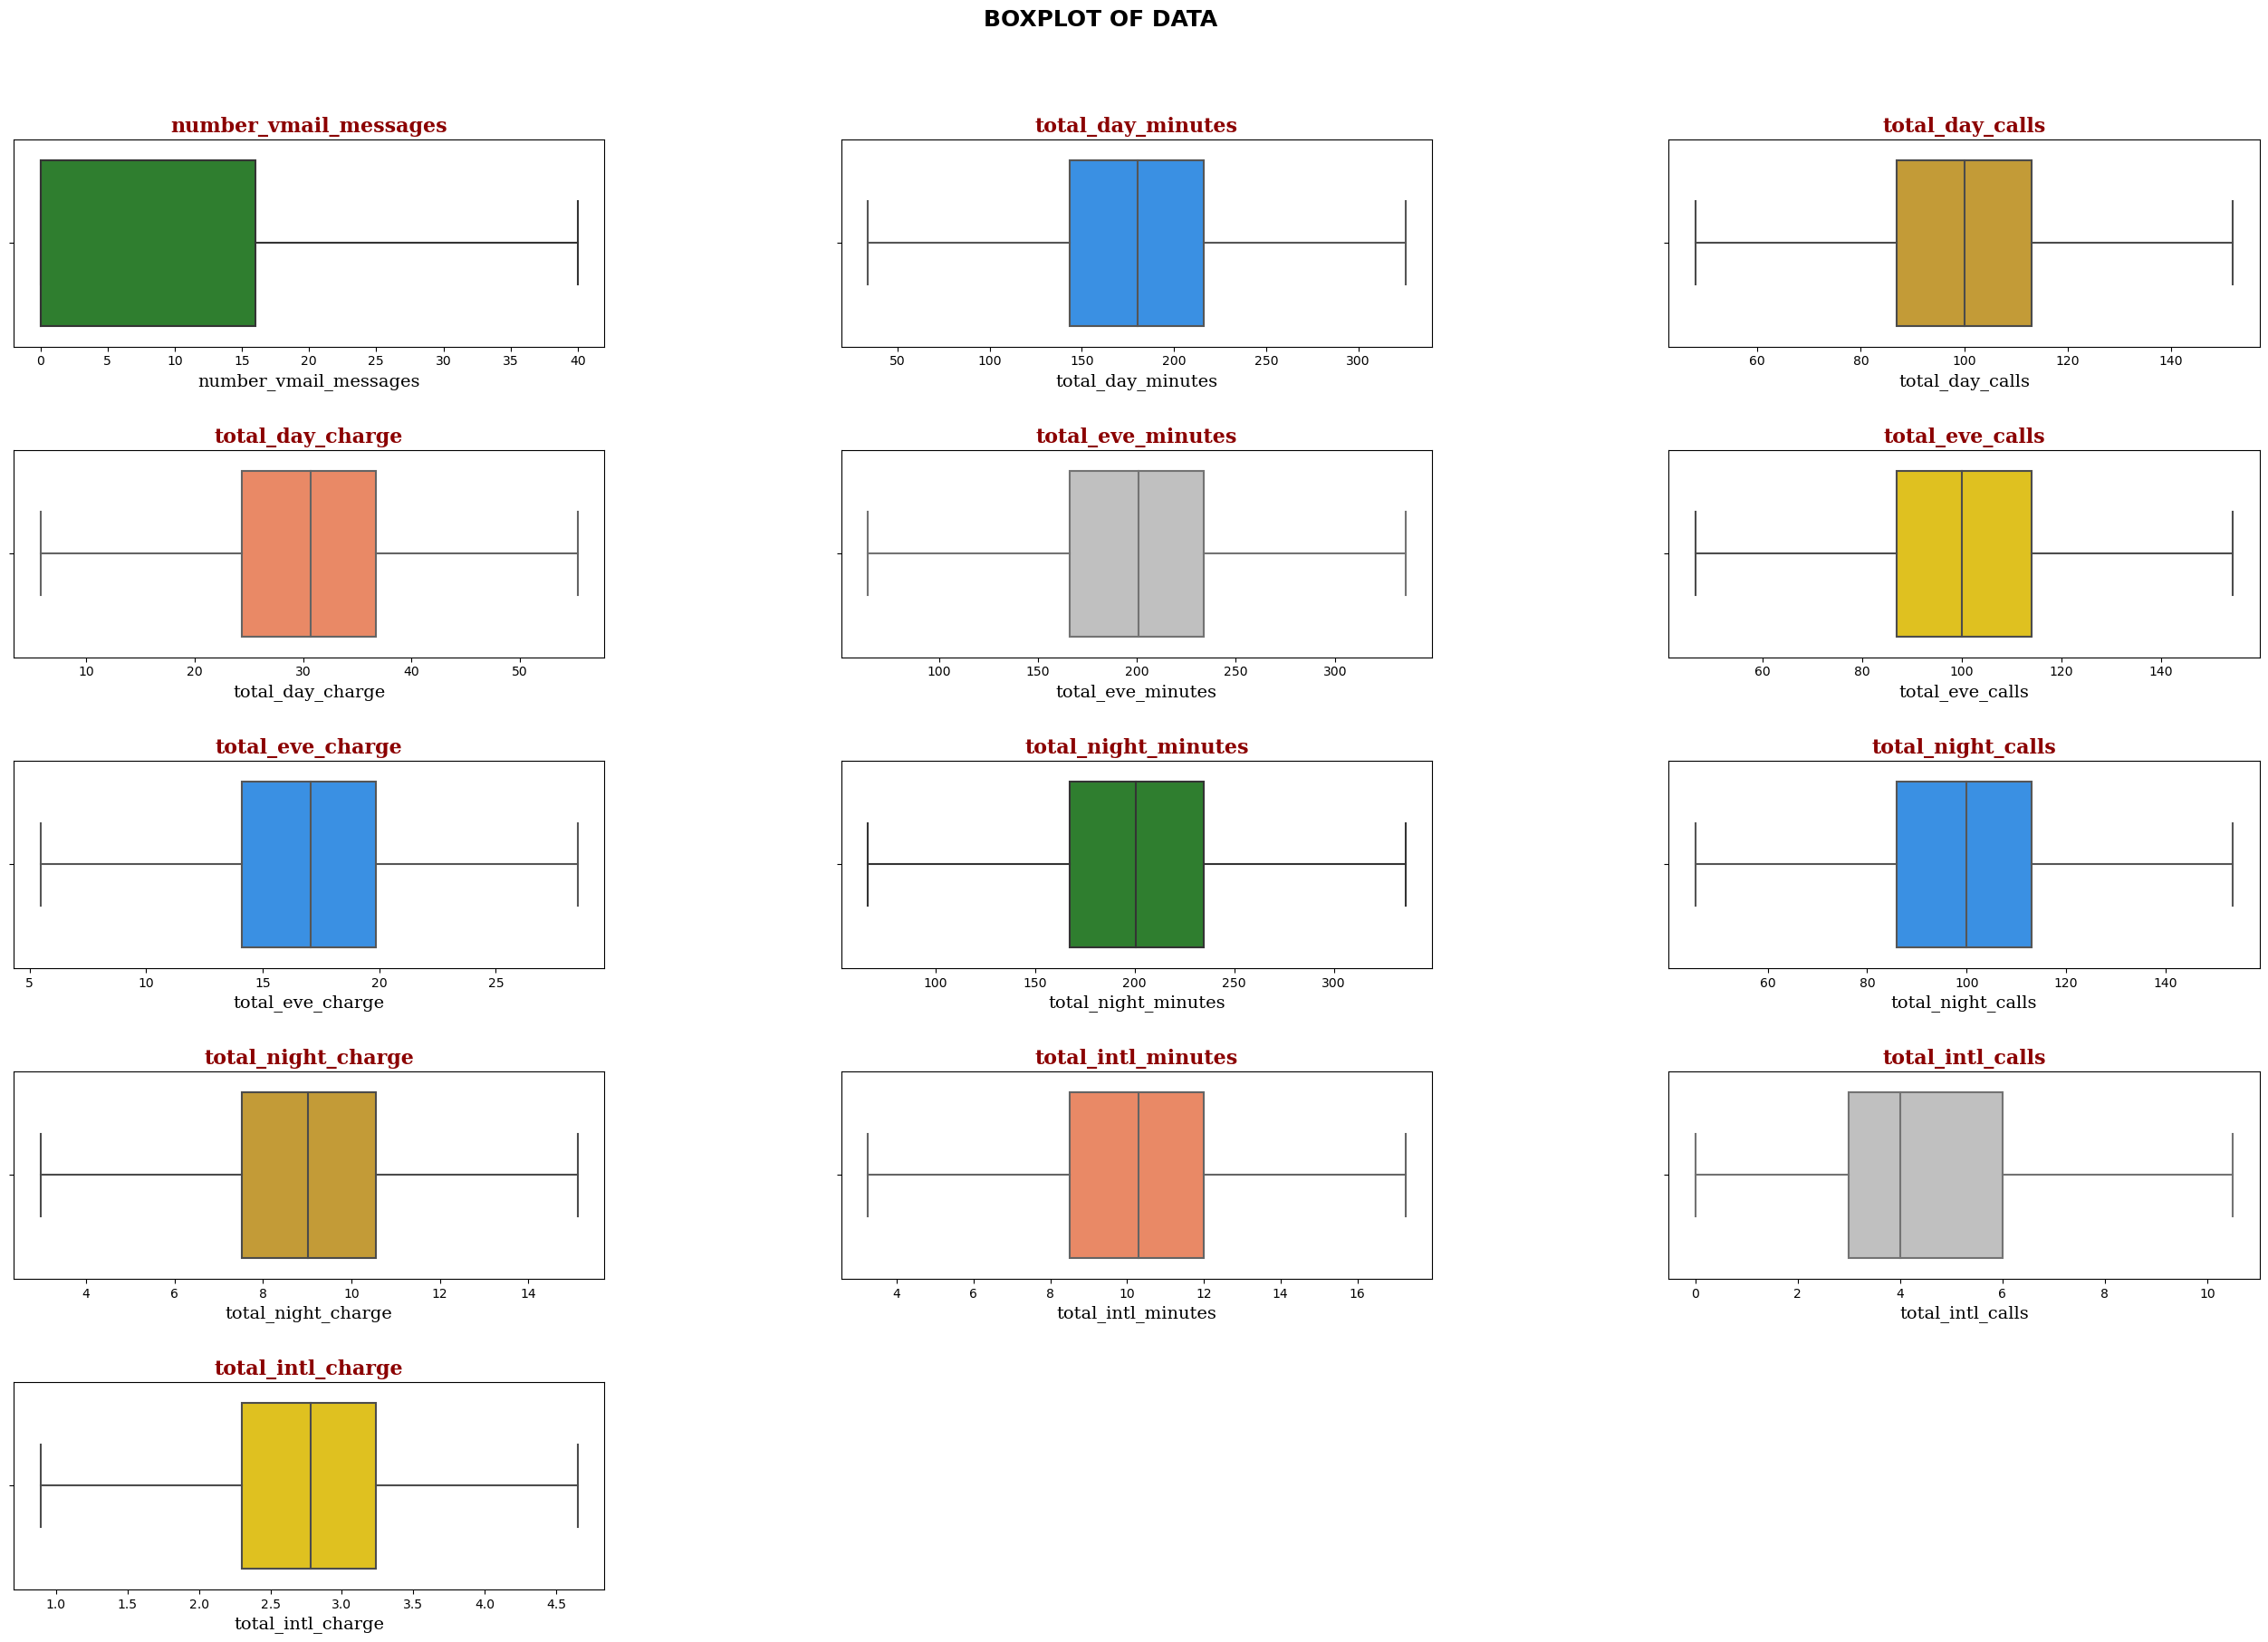

In [24]:
# Create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32, 24])
fig.suptitle('BOXPLOT OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(Num_cols):
    ax1 = fig.add_subplot(6, 3, i+1)
    ax1 = sns.boxplot(data=df, x=col, color=colours[i])
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

#### Freatures Engineering

In [25]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})

df.drop(columns=['state', 'area_code'], inplace=True)

In [26]:
df.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge',
                 'total_day_calls', 'total_eve_calls', 'total_night_calls',
                'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [27]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26.0,13.7,3.0,3.70,1,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3,0,766.35,314.0,75.175


#### Correlation Analysis

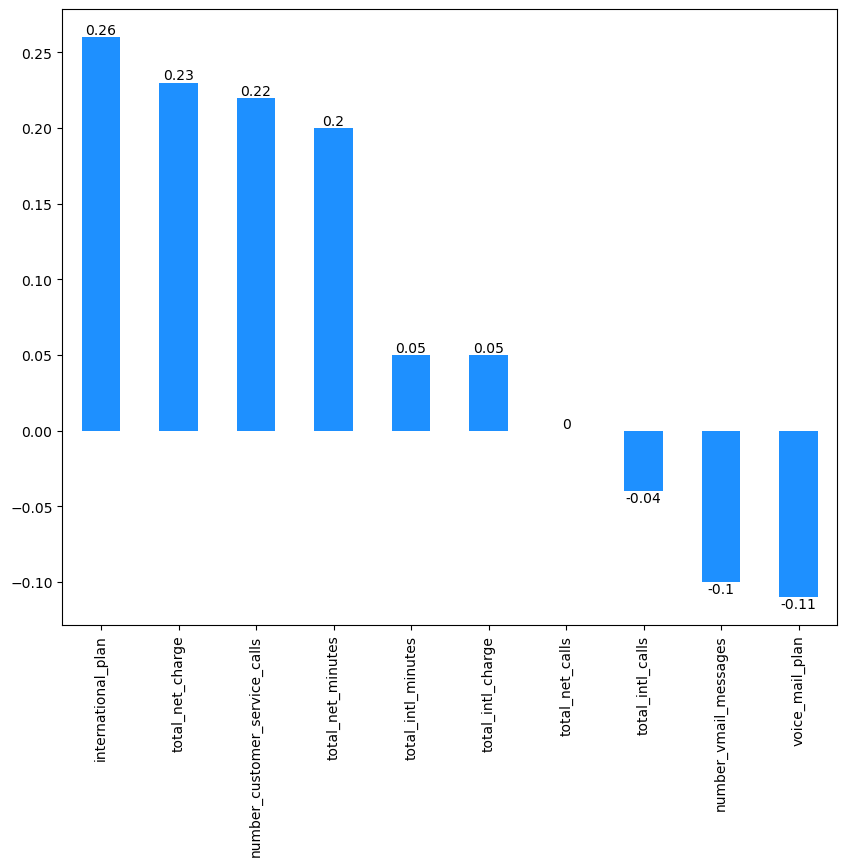

In [28]:
ax = round(df.corr()['churn'].sort_values(ascending=False)[1:], 2).plot(kind='bar', color='dodgerblue', figsize=(10, 8))
ax.bar_label(ax.containers[0])
plt.show()

## Derived Insight:
### HIGH Possibility to take personal loan seen in case of Higher Income, High Credit Cards Spending, and Customers with CD Account,

### HIGH Possibility to take personal loan is seen in case of Without CD Account, Lower Eduction and With One Family Members

### Factors like Credit Cards Availiability, Availability of Online Internet Banking have almost NO impact on personal loan

### This is also evident from the Heatmap below

#### Heatmap

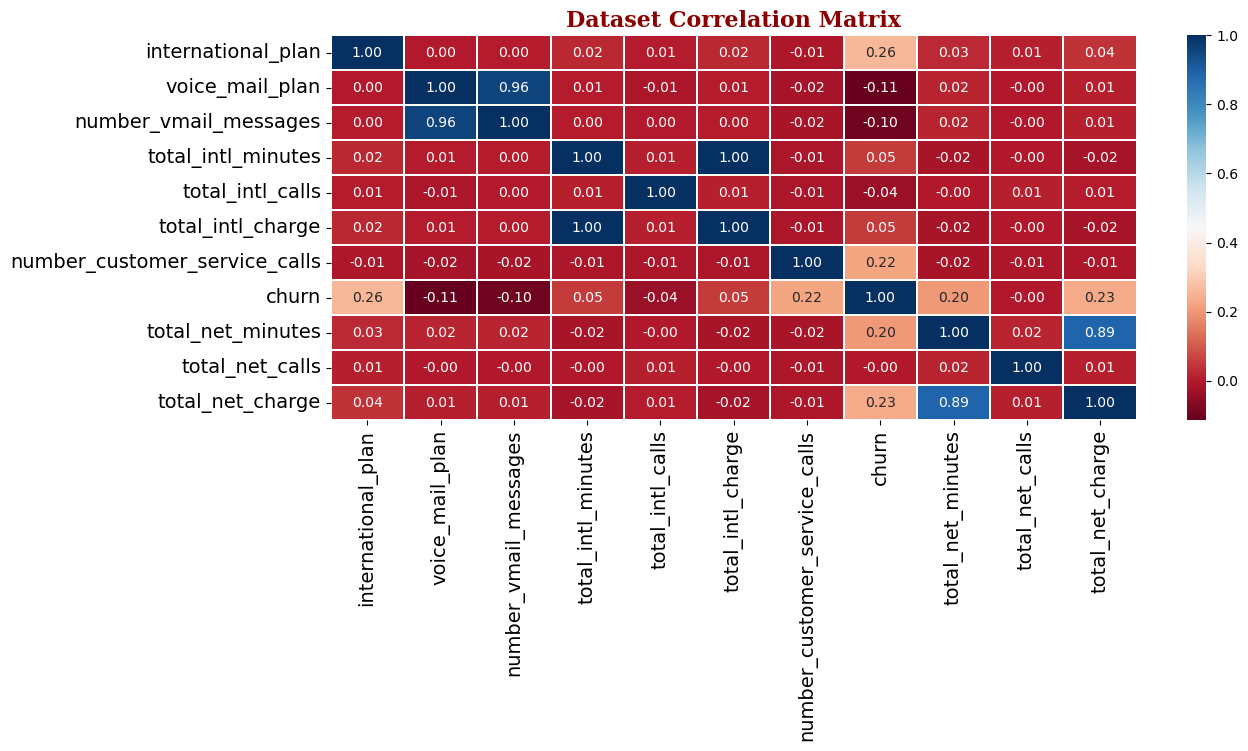

In [29]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13, 5])
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show()

#### Modeling

In [30]:
X = df.drop('churn', 1)
y = df['churn']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3400, 10), (3400,), (850, 10), (850,))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

#### The models used include:
##### K Nearest Neighbors - fast, simple and instance-based
##### Logistic Regression - fast and linear model
##### Random Forest - slower but accurate ensemble model based on decision trees
##### Support Vector Machines - slower but accurate model used here in the non-linear form

In [34]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 
cross_val_score_list = []

In [35]:
def Model_features(X_train, y_train, X_test, y_test, y_pred, classifier, model_name):
    # fig, ax = plt.subplots(figsize=(7, 6))
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred, average='micro'), 3)
    recall =  round(recall_score(y_test, y_pred), 3)
    f1_s = round(f1_score(y_test, y_pred), 3)
    c_val_score = round(cross_val_score(classifier, X, y, cv=10, scoring='accuracy').mean(), 3)
    print(f'Accuracy Score is : {accuracy}')
    print(f'Precision Score is : {precision}')
    print(f'Recall Score is : {recall}')
    print(f'f1 Score is : {f1_s}')
    print(f'cross val score is : {c_val_score}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)
    
    print(metrics.classification_report(y_test, y_pred))

In [36]:
# Define a function that plots the feature weights for a classifier
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False), 2)
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7, 6))
    plt.tick_params(labelsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

In [63]:
def confusion_matrix_plot(confusion_matrix):
    ax = ConfusionMatrixDisplay(confusion_matrix, display_labels=["No Churn", "Churn"])
    ax.plot()
    plt.show()

In [50]:
# Logistic Regression
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model_lr.classes_)
model_lr.score(X_test, y_test)

0.8576470588235294

Accuracy Score is : 0.858
Precision Score is : 0.858
Recall Score is : 0.171
f1 Score is : 0.267
cross val score is : 0.861
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       721
           1       0.61      0.17      0.27       129

    accuracy                           0.86       850
   macro avg       0.74      0.58      0.59       850
weighted avg       0.83      0.86      0.82       850




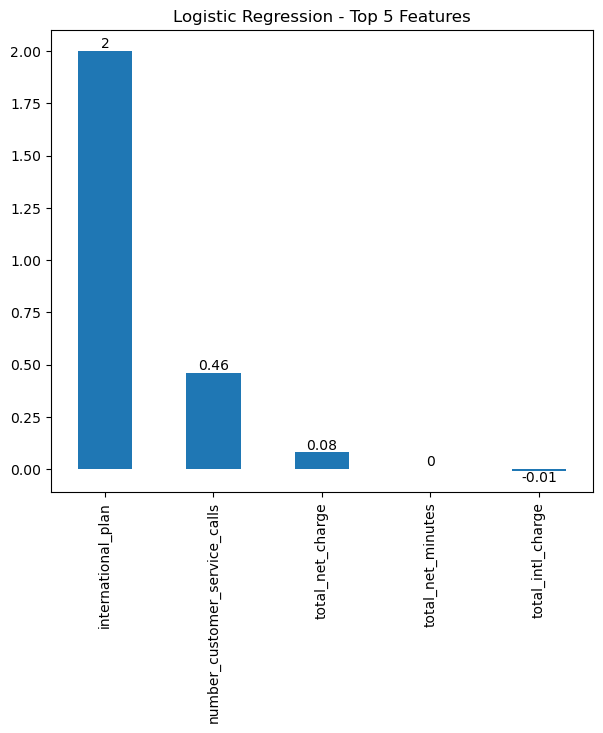

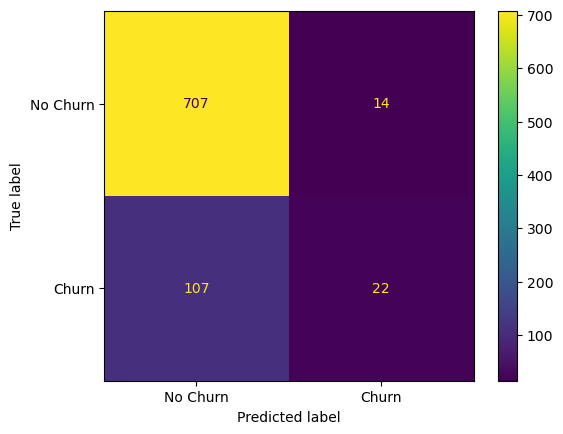

In [64]:
Model_features(X_train, y_train, X_test, y_test, y_pred, model_lr, "Logistic Regression")
feature_weights(X_train, model_lr, "Logistic Regression")
confusion_matrix_plot(confusion_matrix=cm)

#### Random Forest Classifier

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
rf.score(X_test, y_test)

0.9764705882352941

Accuracy Score is : 0.976
Precision Score is : 0.976
Recall Score is : 0.868
f1 Score is : 0.918
cross val score is : 0.974
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       721
           1       0.97      0.87      0.92       129

    accuracy                           0.98       850
   macro avg       0.98      0.93      0.95       850
weighted avg       0.98      0.98      0.98       850



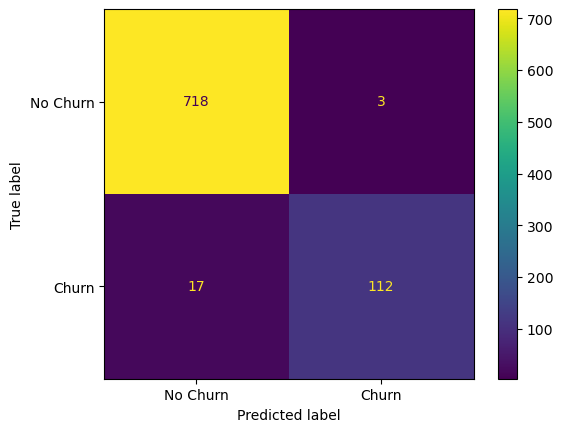

In [69]:
Model_features(X_train, y_train, X_test, y_test, y_pred, rf, "Random Forest Classifier")
confusion_matrix_plot(confusion_matrix=cm)

In [70]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list ,'Cross_Val_Score':cross_val_score_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df

,Model,Accuracy,Precision,f1_score,Recall,Cross_Val_Score
12,Random Forest Classifier,0.976,0.976,0.918,0.868,0.975
13,Random Forest Classifier,0.976,0.976,0.918,0.868,0.974
0,Logistic Regression,0.858,0.858,0.267,0.171,0.861
1,Logistic Regression,0.858,0.858,0.267,0.171,0.861
2,Logistic Regression,0.858,0.858,0.267,0.171,0.861
3,Logistic Regression,0.858,0.858,0.267,0.171,0.861
4,Logistic Regression,0.858,0.858,0.267,0.171,0.861
5,Logistic Regression,0.858,0.858,0.267,0.171,0.861
6,Logistic Regression,0.858,0.858,0.267,0.171,0.861
7,Logistic Regression,0.858,0.858,0.267,0.171,0.861
